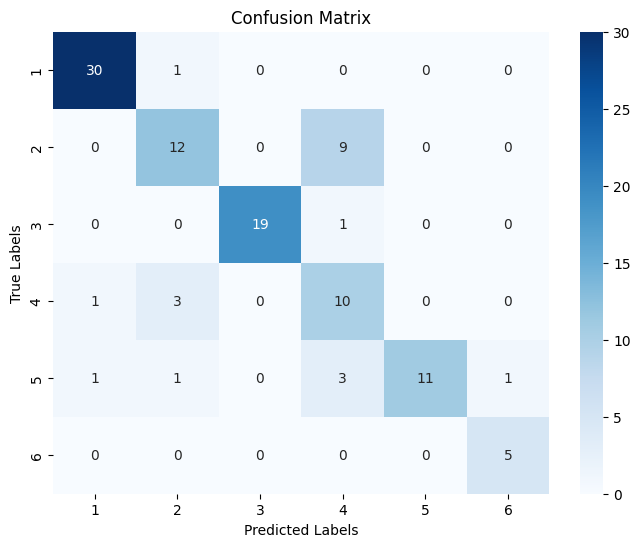

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.71      0.57      0.63        21
           3       1.00      0.95      0.97        20
           4       0.43      0.71      0.54        14
           5       1.00      0.65      0.79        17
           6       0.83      1.00      0.91         5

    accuracy                           0.81       108
   macro avg       0.82      0.81      0.80       108
weighted avg       0.84      0.81      0.81       108

10-Fold Cross Validation Accuracy: 0.88 ± 0.05


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
data = pd.read_csv(url, header=None)
data = data.replace('?', np.nan)  # Replace '?' with NaN if present
data = data.dropna()  # Drop rows with missing values

# Features and Target
X = data.iloc[:, :-1].astype(float)  # Assuming all but the last column are features
y = data.iloc[:, -1].astype(int)    # Assuming the last column is the target

# Random Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn.fit(X_train, y_train)

# Predict on Test Set
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(f"10-Fold Cross Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")
